In [26]:
#importar bibliotecas para el analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#comandos para crear funciones que permiten la "limpieza de los datos", en este caso separadores de decimales con comas
def CCleanData(x):
    x=x.replace(',','.')
    x=x.replace(' ','')
    try: 
        x=round(float(x), 3)
    except:
        x=0
    
    return x

#importar datos
datos=pd.read_csv(r"C:\Users\lmila\OneDrive\Documentos\MAESTRIA\INFORMATICA\uso.csv", on_bad_lines='skip', delimiter=';',
#converters={
    #'Altura_Tot':CCleanData, 
    #'PreATerre':CCleanData, 
    #}, 
nrows=1000)

In [28]:
#3. Mostrar el encabezado de los datos
print(datos.head())

   OBJECTID    USOCLOTE  USOTUSO              USOAREA
0         1  2570062010        4   24,000000000000000
1         2  2558033002        1   70,700000000000003
2         3  4534032004        1  108,890000000000001
3         4  5682002018        1  106,900000000000006
4         5  5682002020        1  126,100000000000009


In [29]:
#3A. muestra una columna especifica
print(datos['USOCLOTE'])

0      2570062010
1      2558033002
2      4534032004
3      5682002018
4      5682002020
          ...    
995    4604043005
996    4204006015
997    4208013004
998    4204017021
999    4208013023
Name: USOCLOTE, Length: 1000, dtype: int64


In [30]:
#3B. Muestra una fila especifica
#iloc: search by row`s index
#loc: search by row`s label
row=datos.iloc[1]
print(row)

OBJECTID                     2
USOCLOTE            2558033002
USOTUSO                      1
USOAREA     70,700000000000003
Name: 1, dtype: object


In [31]:
#4. Dimension of the dataframe
print(datos.shape)

(1000, 4)


In [32]:
#5. Informacion de las columnas de los datos

print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   OBJECTID  1000 non-null   int64 
 1   USOCLOTE  1000 non-null   int64 
 2   USOTUSO   1000 non-null   int64 
 3   USOAREA   1000 non-null   object
dtypes: int64(3), object(1)
memory usage: 31.4+ KB
None


In [33]:
#6. estadistica

print(datos.describe())

          OBJECTID      USOCLOTE      USOTUSO
count  1000.000000  1.000000e+03  1000.000000
mean    500.500000  6.429766e+09     6.293000
std     288.819436  1.780998e+10    14.868767
min       1.000000  1.101004e+09     1.000000
25%     250.750000  2.530092e+09     1.000000
50%     500.500000  2.616069e+09     1.000000
75%     750.250000  4.581013e+09     3.000000
max    1000.000000  2.053180e+11    96.000000


In [34]:
#6.A. estadistica de una columna

print(datos['USOCLOTE'].describe())

count    1.000000e+03
mean     6.429766e+09
std      1.780998e+10
min      1.101004e+09
25%      2.530092e+09
50%      2.616069e+09
75%      4.581013e+09
max      2.053180e+11
Name: USOCLOTE, dtype: float64


In [35]:
#6.B. Estadisticas especificas-Media
print(datos['USOCLOTE'].median())

2616069012.0


In [36]:
#6.B. Estadisticas especificas-Varianza
print(datos['USOCLOTE'].var())

3.1719549995222644e+20


<AxesSubplot:>

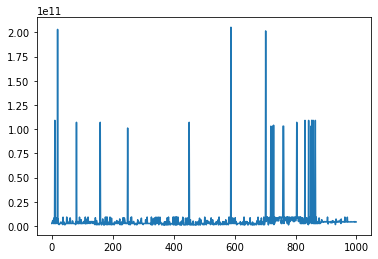

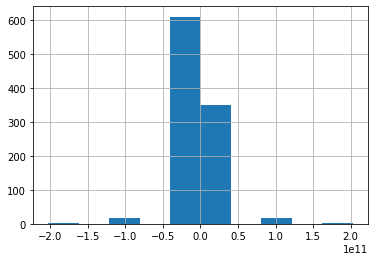

In [37]:
#7. graficas

plt.figure()
datos['USOCLOTE'].plot()
plt.figure()
datos['USOCLOTE'].diff().hist()


<AxesSubplot:>

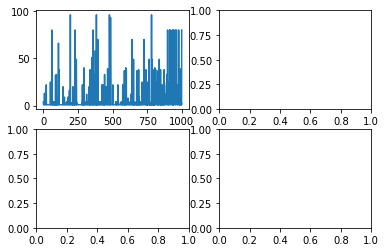

In [38]:
#7.A Subplots
#To create a figure and a matrix of axes

fig, axes = plt.subplots(nrows=2, ncols=2)
datos['USOTUSO'].plot(ax=axes[0,0])
#compositeFigure=datos['USOCLOTE'].plot(kind='density', ax=axes[0,1])
#compositeFigure.axvline(datos['USOCLOTE'].mean(), color="red")
#compositeFigure.axvline(datos['USOCLOTE'].median(), color="#00FF00")

#datos['PreAConst'].plot(kind='box', ax=axes[1,0], vert=False)
#datos.plot.scatter(x='PreAConst', y='OBJECTID',ax=axes[1,1])
#plt.show()


#[['PreAFachad','PreACubier', 'PreAPisos', 'PrePuntaje']].plot(kind='box', subplots=True, layout=(2,2))
#plt.show()



1     741
4      86
22     22
3      19
38     18
20     15
80     14
25     12
12     10
49      9
10      7
9       7
33      6
2       6
96      4
40      4
37      4
70      3
13      3
16      2
39      2
66      1
32      1
51      1
58      1
93      1
8       1
Name: USOTUSO, dtype: int64


<Figure size 432x288 with 0 Axes>

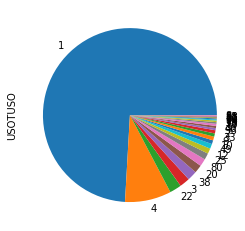

<Figure size 432x288 with 0 Axes>

In [39]:
#8. Categorical analysis
print(datos['USOTUSO'].value_counts())

plt.figure()
datos['USOTUSO'].value_counts().plot(kind='pie')
plt.figure()
#myData['PreNBarrio'].value_counts().plot(kind='bar', ylabel='Cantidad de Predios')
#plt.show()


In [42]:
#9. Correlation
corr=datos.corr()
#Data
print(corr.to_string())
#Graphical depiction

          OBJECTID  USOCLOTE   USOTUSO
OBJECTID  1.000000  0.075240  0.167851
USOCLOTE  0.075240  1.000000 -0.009084
USOTUSO   0.167851 -0.009084  1.000000


In [45]:
#10. Add columns to dataframe
#Using numpy`s where function: where(condition, [x, y]), return elements chosen from x or y depending on condition.
datos['PreBuildPercent']= np.where(datos['USOTUSO']!=0, datos['USOTUSO']/datos['USOTUSO'], 0)
#Using lambda functions
#myData['PreBuildPercent']= myData.apply(lambda x: x.PreAConst/x.PreATerre if x.PreATerre!=0 else 0, axis=1)
#Using direct operation
#myData['PreBuildPercent']= myData['PreAConst']/myData['PreATerre']
#Using custom function

#def myFunc(x):
#    if x.PreATerre!=0:
#        return x.PreAConst/x.PreATerre
#    else:
#        return 0
#myData['PreBuildPercent']= myData.apply(myFunc, axis=1)
#for x in myData['PreBuildPercent']:

In [60]:
#12. Select the rows that meet some criteria
# loc selects rows and columns using labels, iloc selects rows and columns using integer positions
#rows that meet some criteria and all columns
Mdata=datos.loc[datos['USOTUSO']=='24']
print(Mdata)


Empty DataFrame
Columns: [OBJECTID, USOCLOTE, USOTUSO, USOAREA, PreBuildPercent]
Index: []
